# Problem 1

## (a)

$\Large \frac{\partial \rho}{\partial t} = \frac{\rho_{x}^{t+1} - \rho_{x}^{t}}{\Delta t}$

$\Large \frac{\partial u}{\partial x} = \frac{u_{x}^{t} - u_{x-1}^{t}}{\Delta x}$

Substituting...

$\Large \frac{\rho_{x}^{t+1} - \rho_{x}^{t}}{\Delta t} + \rho \frac{u_{x}^{t} - u_{x-1}^{t}}{\Delta x} = 0$

$\Large \rho_{x}^{t+1} = \rho_{x}^{t} - \rho \frac{\Delta t}{\Delta x} (u_{x}^{t} - u_{x-1}^{t})$

---

$\pagebreak$

## (b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,t,v,L):
    return -v*(x/(L-v*t))

In [25]:
def mass_density(L,t_end,v,rho_0):
    L = L/1000
    
    delta_x = 0.014
    x = np.arange(0,L,delta_x)
    x = np.insert(x, 9, L)
#     x = np.flip(x)
    
    delta_t = 0.0005
    t = np.arange(0,t_end+0.0001,delta_t)
    
#     print(len(x),len(t))
#     print(x,t)

#     D = rho_0*(delta_t/delta_x)
    
    rho = np.zeros((len(t),len(x)))
    
    # Insert initial condition (density at t=0)
    for idx in range(len(x)):
        rho[0,idx] = rho_0
    
    for time in range(1,len(t)):
        for idx in range(1,len(x)):
            #rho[time,idx] = rho[time-1,idx] - D * (f(x[idx],t[time],v,L) - f(x[idx-1],t[time],v,L))
            rho[time,idx] = rho[time-1,idx] - rho[time-1,idx]*(delta_t/delta_x) * (f(x[idx],t[time],v,L) - f(x[idx-1],t[time],v,L))
    
    plt.plot(t,np.diagonal(rho), '-o',label = f"$\\nu$ = {v}")
    plt.title("$\\rho(t)$ vs t")
    plt.xlabel('$t$')
    plt.ylabel('$\\rho(t)$')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return t, np.diagonal(rho)

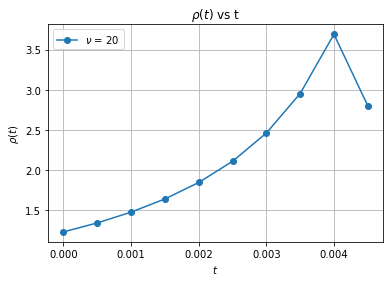

In [26]:
L=120
t_end = 0.0045
v = 20
rho_0 = 1.23
t1,rho1 = mass_density(L,t_end,v,rho_0)

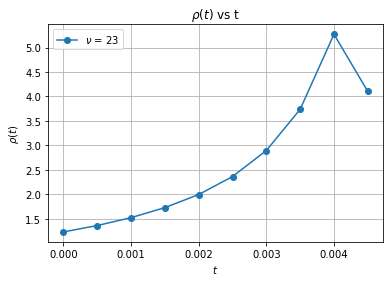

In [27]:
L=120
t_end = 0.0045
v = 23
rho_0 = 1.23
t2,rho2 = mass_density(L,t_end,v,rho_0)

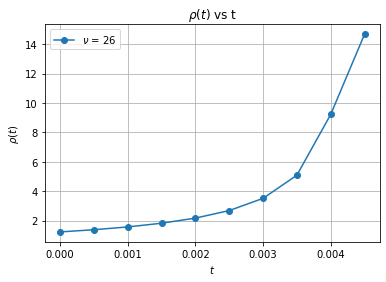

In [28]:
L=120
t_end = 0.0045
v = 26
rho_0 = 1.23
t3,rho3 = mass_density(L,t_end,v,rho_0)

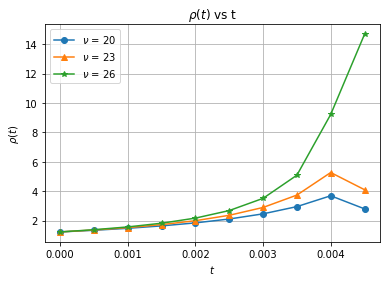

In [29]:
plt.plot(t1,rho1, '-o', label = f"$\\nu$ = 20")
plt.plot(t2,rho2, '-^', label = f"$\\nu$ = 23")
plt.plot(t3,rho3, '-*', label = f"$\\nu$ = 26")
plt.title("$\\rho(t)$ vs t")
plt.xlabel('$t$')
plt.ylabel('$\\rho(t)$')
plt.legend()
plt.grid(True)
plt.show()

---

$\pagebreak$

# Problem 2

## (a)

$\Large \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}$

$\Large \frac{u_{i}^{n+1} - u_{i}^{n}}{\Delta t} + u_{i}^{n} \frac{u_{i}^{n} - u_{i-1}^{n}}{\Delta x} = \nu \frac{u_{i+1}^{n} - 2 u_{i}^{n} + u_{i-1}^{n}}{\Delta x^2}$

$\Large u_{i}^{n+1} = u_{i}^{n} - u_{i}^{n} \frac{\Delta t}{\Delta x}(u_{i}^{n} - u_{i-1}^{n}) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^{n} - 2 u_{i}^{n} + u_{i-1}^{n})$

---

$\pagebreak$

## (b)

The time step for stability requirement is

$\Large \Delta t \leq (\frac{|u|}{\Delta x}+\frac{2D}{(\Delta x)^2})^{-1}$

In [31]:
L = 1
v = 0.05

delta_x = 0.001
x0 = np.arange(0,L,delta_x)

u0 = np.zeros(len(x0))
for idx, space in enumerate(x0):
    u0[idx] = (np.sin(np.pi*space))**40

time_step = ((np.abs(u0)/delta_x) + (2*v)/(delta_x**2))**(-1)
print(min(time_step))

9.9009900990099e-06


---

$\pagebreak$

## (c)

In [32]:
def convection_diffusion(L,v,T,delta_x,delta_t):
    x = np.arange(0,L+delta_x,delta_x)
    t = np.arange(0,T+delta_t,delta_t)
    
    u = np.zeros((len(t),len(x)))

    for idx, space in enumerate(x):
        u[0,idx] = (np.sin(np.pi*space))**40
        
    for time in range(1,len(t)):
        for idx in range(1,len(x)):
            if u[time-1,idx]<0:
                try:
                    u[time,idx] = u[time-1,idx]+u[time-1,idx]*(delta_t/delta_x)*(u[time-1,idx] - u[time-1,idx+1]) + ((v*delta_t)/(delta_x**2))*(u[time-1,idx-1] - 2*u[time-1,idx] + u[time-1,idx+1])
                except:
                    continue
            else:
                try:
                    u[time,idx] = u[time-1,idx]+u[time-1,idx]*(delta_t/delta_x)*(u[time-1,idx-1] - u[time-1,idx]) + ((v*delta_t)/(delta_x**2))*(u[time-1,idx-1] - 2*u[time-1,idx] + u[time-1,idx+1])
                except:
                    continue
    
    plt.plot(x, u[-1], label = f"u(x,t) at {T}")
    plt.title(f"$u(x,t)$ at t = {T} vs x")
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return x, u[-1]

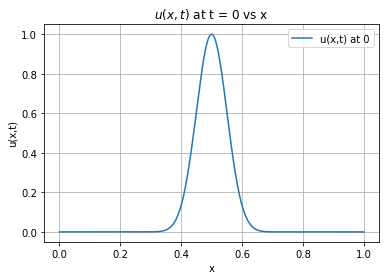

In [33]:
L = 1
v = 0.05
T = 0
delta_x = 0.001
delta_t = 9.9009900990099e-06
x0,u0 = convection_diffusion(L,v,T,delta_x,delta_t)

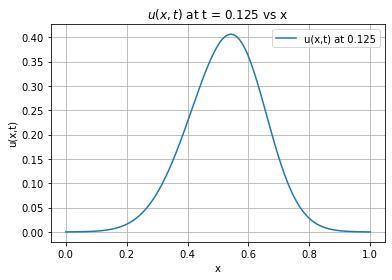

In [34]:
T = 0.125
x1,u1 = convection_diffusion(L,v,T,delta_x,delta_t)

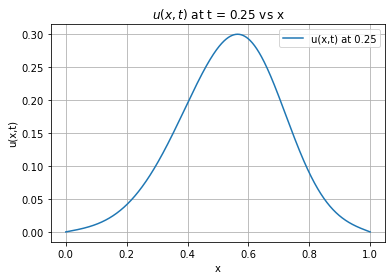

In [35]:
T = 0.25
x2,u2 = convection_diffusion(L,v,T,delta_x,delta_t)

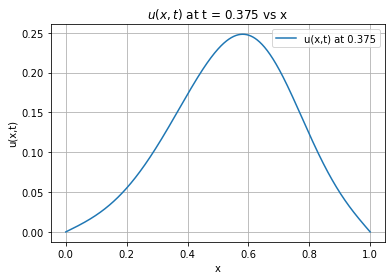

In [36]:
T = 0.375
x3,u3 = convection_diffusion(L,v,T,delta_x,delta_t)

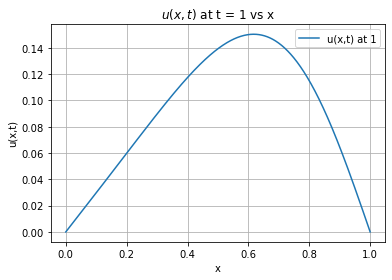

In [37]:
T = 1
x4,u4 = convection_diffusion(L,v,T,delta_x,delta_t)

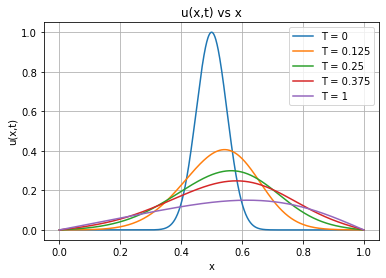

In [38]:
plt.plot(x0, u0, label = "T = 0")
plt.plot(x1, u1, label = "T = 0.125")
plt.plot(x2, u2, label = "T = 0.25")
plt.plot(x3, u3, label = "T = 0.375")
plt.plot(x4, u4, label = "T = 1")
plt.title(f"u(x,t) vs x")
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid()
plt.show()

---

$\pagebreak$

# Problem 3

## (a)

In [39]:
a   =  0.0; # Location of boundary 'a' for 'x'
b   =  2.0; # Location of boundary 'b' for 'x'

c   =  0.0; # Location of boundary 'c' for 'y'
d   =  2; # Location of boundary 'd' for 'y'

dx = 2/3
Nx = len(np.arange(a,b,dx)) #N
dy = 2/3
Ny = len(np.arange(c,d,dy)) #M
print(Nx, Ny)

3 3


In [40]:
h = (b-a)/Nx
h

0.6666666666666666

In [41]:
# D Matrix
D = np.zeros((Nx-1,Nx-1))
# D.shape
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        try:
            if i == j:
                D[i,j] = 4
                D[i, j+1] = -1
                D[i+1,j] = -1
        except:
            continue
print(D)

[[ 4. -1.]
 [-1.  4.]]


In [42]:
# I matrix
I = np.eye(Nx-1)
print(I)

[[1. 0.]
 [0. 1.]]


In [43]:
# A matrix
m = n = (Nx-1)*(Ny-1)
rows = columns = m*n
A = np.zeros((m,n))
A.shape

(4, 4)

In [44]:
row_idx = np.arange(0,m+1,D.shape[0])
col_idx = np.arange(0,n+1,D.shape[1])
# print(row_idx,col_idx)
for idx, row_col in enumerate(zip(row_idx,col_idx)):
#     print (idx,row_col)
    try:
        A[row_idx[idx]:row_idx[idx+1],col_idx[idx]:col_idx[idx+1]] = D
        A[row_idx[idx]:row_idx[idx+1],col_idx[idx+1]:col_idx[idx+2]] = -I
        A[row_idx[idx+1]:row_idx[idx+2],col_idx[idx]:col_idx[idx+1]] = -I
    except:
        continue
        
print(A)

[[ 4. -1. -1. -0.]
 [-1.  4. -0. -1.]
 [-1. -0.  4. -1.]
 [-0. -1. -1.  4.]]


In [45]:
B = np.zeros((A.shape[0],1))
# B.shape
B

array([[0.],
       [0.],
       [0.],
       [0.]])

In [46]:
x = np.linspace(a,b,Nx+1) # Defining locations 'x'
y = np.linspace(c,d,Ny+1) # Defining locations 'x'
print(x,y)

[0.         0.66666667 1.33333333 2.        ] [0.         0.66666667 1.33333333 2.        ]


In [47]:
def g(x,y):
    if x==0:
        if y <= 1:
            return 1
        else:
            return 0
    if x ==2:
        if y <= 1:
            return 0
        else:
            return 1
    if y==0:
        return 0
    if y==2:
        return 0
    else:
        return 0

In [48]:
idx = 0
for y_idx in range(1,Ny):
    for x_idx in range(1,Nx):
#         print(x_idx,y_idx)
        B[idx] = g(x[x_idx-1],y[y_idx])+\
                g(x[x_idx],y[y_idx-1])+\
                g(x[x_idx],y[y_idx+1])+\
                g(x[x_idx+1],y[y_idx])
        idx = idx+1
print(B)

[[1.]
 [0.]
 [0.]
 [1.]]


In [49]:
c =np.matmul(np.linalg.inv(A),B)
c

array([[0.33333333],
       [0.16666667],
       [0.16666667],
       [0.33333333]])

In [50]:
print(f"A = {A}")
print()
print(f"c = {c}")
print()
print(f"b = {B}")

A = [[ 4. -1. -1. -0.]
 [-1.  4. -0. -1.]
 [-1. -0.  4. -1.]
 [-0. -1. -1.  4.]]

c = [[0.33333333]
 [0.16666667]
 [0.16666667]
 [0.33333333]]

b = [[1.]
 [0.]
 [0.]
 [1.]]


---

$\pagebreak$

## (b)

In [73]:
a   =  0.0; # Location of boundary 'a' for 'x'
b   =  2.0; # Location of boundary 'b' for 'x'

c   =  0.0; # Location of boundary 'c' for 'y'
d   =  2; # Location of boundary 'd' for 'y'

dx = 0.1
Nx = len(np.arange(a,b,dx)) #N
dy = 0.1
Ny = len(np.arange(c,d,dy)) #M
print(Nx, Ny)

20 20


In [74]:
h = (b-a)/Nx
h

0.1

In [75]:
# D Matrix
D = np.zeros((Nx-1,Nx-1))

for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        try:
            if i == j:
                D[i,j] = 4
                D[i, j+1] = -1
                D[i+1,j] = -1
        except:
            continue
D.shape

(19, 19)

In [76]:
# I matrix
I = np.eye(Nx-1)
I.shape

(19, 19)

In [77]:
# A matrix
m = n = (Nx-1)*(Ny-1)
rows = columns = m*n
A = np.zeros((m,n))
A.shape

(361, 361)

In [78]:
row_idx = np.arange(0,m+1,D.shape[0])
col_idx = np.arange(0,n+1,D.shape[1])
# print(row_idx,col_idx)
for idx, row_col in enumerate(zip(row_idx,col_idx)):
#     print (idx,row_col)
    try:
        A[row_idx[idx]:row_idx[idx+1],col_idx[idx]:col_idx[idx+1]] = D
        A[row_idx[idx]:row_idx[idx+1],col_idx[idx+1]:col_idx[idx+2]] = -I
        A[row_idx[idx+1]:row_idx[idx+2],col_idx[idx]:col_idx[idx+1]] = -I
    except:
        continue
        
A.shape

(361, 361)

In [79]:
B = np.zeros((A.shape[0],1))
B.shape

(361, 1)

In [80]:
x = np.linspace(a,b,Nx+1) # Defining locations 'x'
y = np.linspace(c,d,Ny+1) # Defining locations 'x'
print(x,y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]


In [81]:
def g(x,y):
    if x==0:
        if y <= 1:
            return 1
        else:
            return 0
    if x ==2:
        if y <= 1:
            return 0
        else:
            return 1
    if y==0:
        return 0
    if y==2:
        return 0
    else:
        return 0

In [84]:
idx = 0
for y_idx in range(1,Ny):
    for x_idx in range(1,Nx):
#         print(x_idx,y_idx)
        B[idx] = g(x[x_idx-1],y[y_idx])+\
                g(x[x_idx],y[y_idx-1])+\
                g(x[x_idx],y[y_idx+1])+\
                g(x[x_idx+1],y[y_idx])
        idx = idx+1
# print(B)

In [85]:
c =np.matmul(np.linalg.inv(A),B)
# c

In [86]:
c1  = np.reshape(c,(Ny-1,Nx-1))
c1.shape

(19, 19)

In [87]:
# Add boundary conditions
top_bc = np.zeros(Nx-1)
bottom_bc = np.zeros(Nx-1)
left_bc = (np.ones(Ny+1))[...,None]
left_bc[11:,:] = 0
right_bc = (np.ones(Ny+1))[...,None]
right_bc[0:11,:] = 0

In [88]:
c1 = np.vstack([c1, top_bc])
c1 = np.vstack([bottom_bc, c1])
c1 = np.concatenate((c1, right_bc), 1)
c1 = np.concatenate((left_bc, c1), 1)

c1.shape

(21, 21)

### 1. The concentration vs x along y = 0.5 cm, 1 cm, 1.5 cm

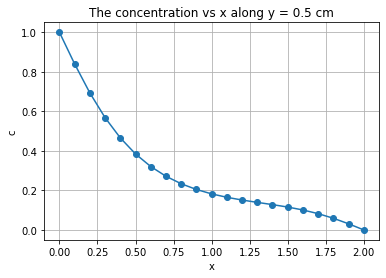

In [89]:
c1_x1 = c1[5,:]
plt.plot(x,c1_x1,'o-')
plt.title('The concentration vs x along y = 0.5 cm')
plt.xlabel('x')
plt.ylabel('c')
plt.grid()
plt.show()

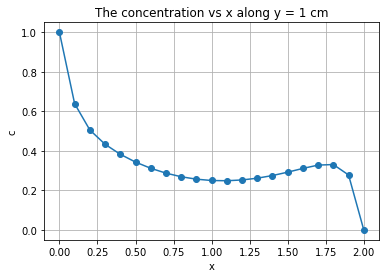

In [90]:
c1_x2 = c1[10,:]
plt.plot(x,c1_x2,'o-')
plt.title('The concentration vs x along y = 1 cm')
plt.xlabel('x')
plt.ylabel('c')
plt.grid()
plt.show()

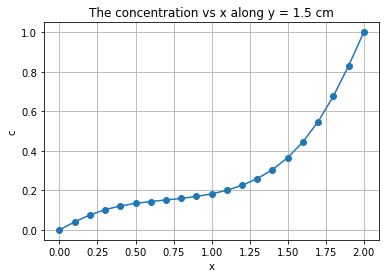

In [91]:
c1_x3 = c1[15,:]
plt.plot(x,c1_x3,'o-')
plt.title('The concentration vs x along y = 1.5 cm')
plt.xlabel('x')
plt.ylabel('c')
plt.grid()
plt.show()

---

$\pagebreak$

### 2. The concentration vs y along x = 0.5 cm, 1 cm, 1.5 cm

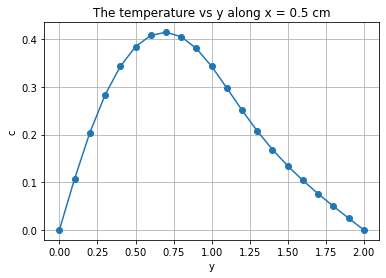

In [92]:
c1_y1 = c1[:,5]
plt.plot(y,c1_y1,'o-')
plt.title('The temperature vs y along x = 0.5 cm')
plt.xlabel('y')
plt.ylabel('c')
plt.grid()
plt.show()

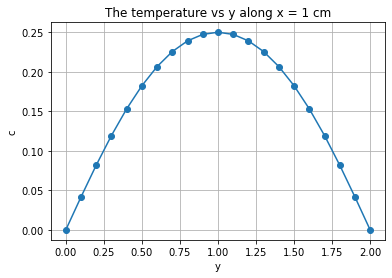

In [93]:
c1_y2 = c1[:,10]
plt.plot(y,c1_y2,'o-')
plt.title('The temperature vs y along x = 1 cm')
plt.xlabel('y')
plt.ylabel('c')
plt.grid()
plt.show()

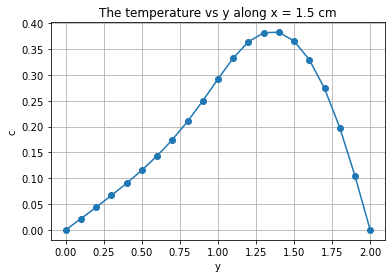

In [94]:
c1_y3 = c1[:,15]
plt.plot(y,c1_y3,'o-')
plt.title('The temperature vs y along x = 1.5 cm')
plt.xlabel('y')
plt.ylabel('c')
plt.grid()
plt.show()

---

$\pagebreak$

### 3. Contour plot of the concentration c(x,y).

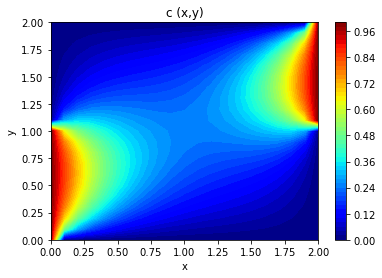

In [95]:
# Creating 2-D grid of features
[X, Y] = np.meshgrid(x, y)
  
Z = c1

# Set colour interpolation and colour map
colorinterpolation = 50
colourMap = plt.cm.jet #you can try: colourMap = plt.cm.coolwarm
  
# plots filled contour plot
plt.contourf(X, Y, Z, colorinterpolation, cmap=colourMap)
# plt.contourf(X, Y, Z)
  
plt.title('c (x,y)')
plt.xlabel('x')
plt.ylabel('y')

plt.colorbar()

plt.show()

---